In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline




In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df.shape

(200, 4)

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

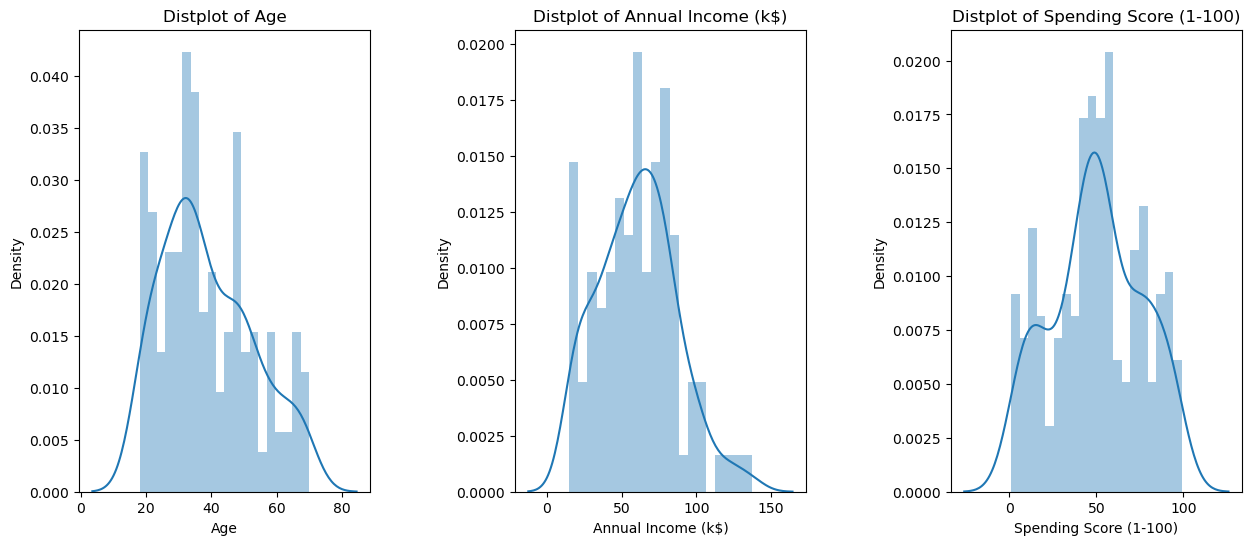

In [10]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

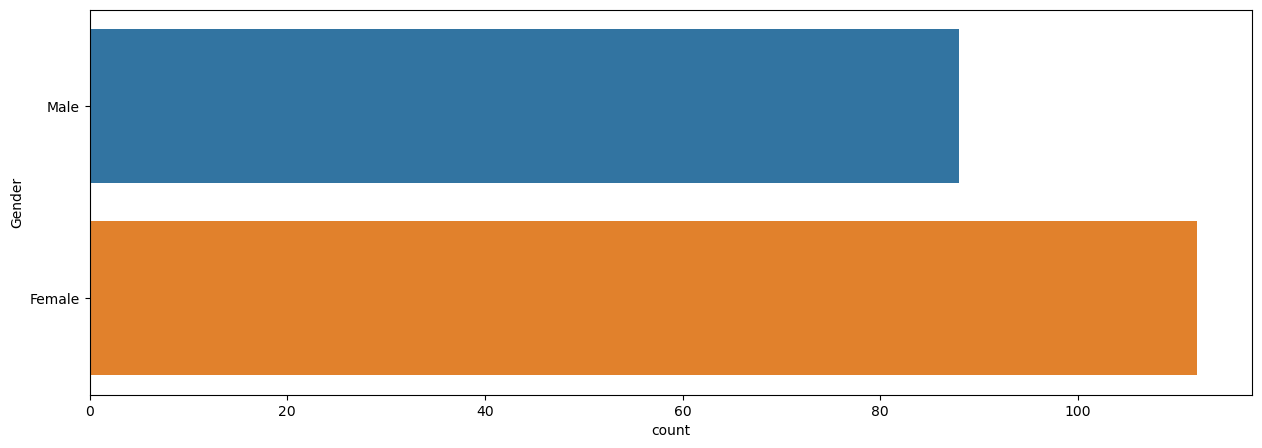

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

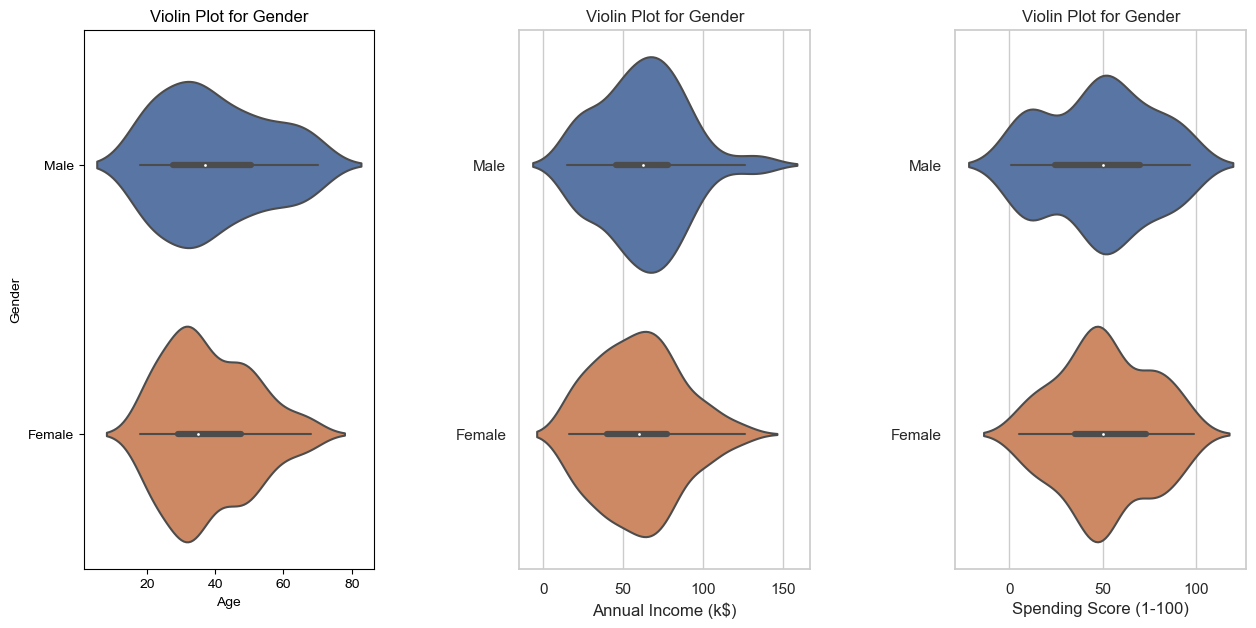

In [12]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x=cols , y = 'Gender', data = df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot for Gender')
plt.show()

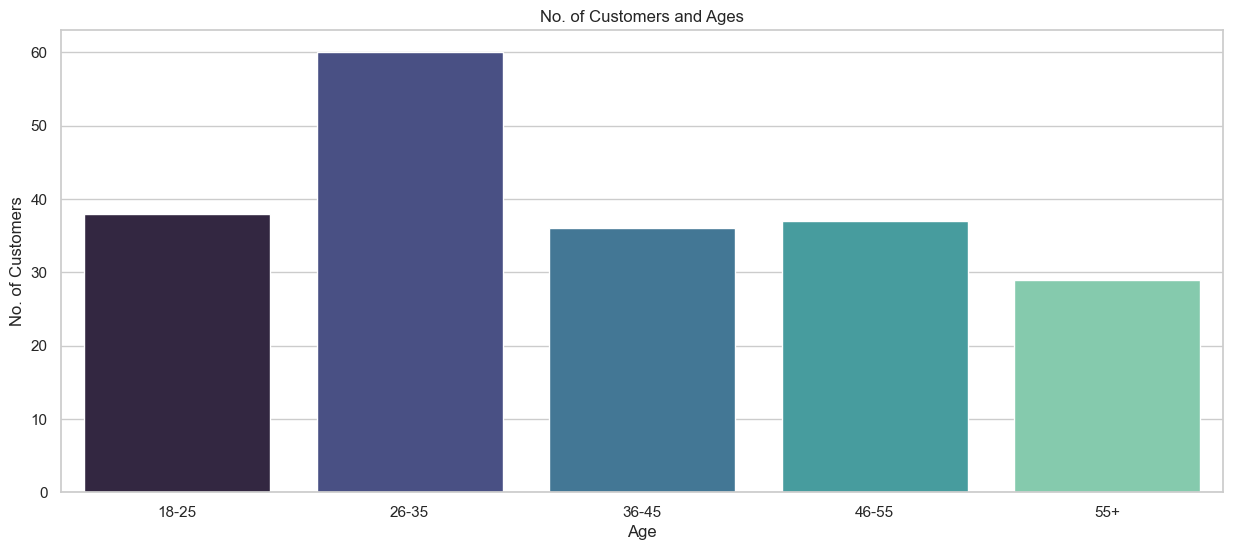

In [13]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[(df.Age >= 56)]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette ="mako")
plt.title('No. of Customers and Ages')
plt.xlabel("Age")
plt.ylabel("No. of Customers")
plt.show()


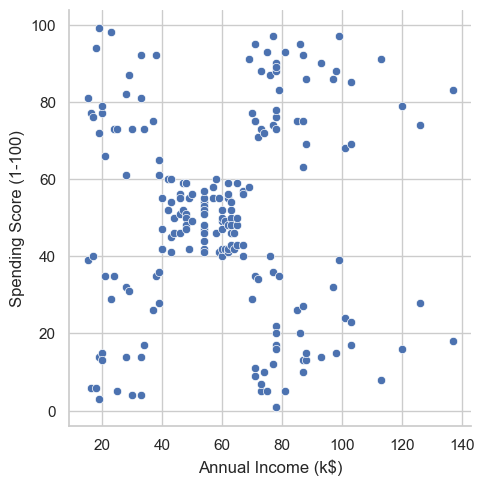

In [14]:
sns.relplot(x="Annual Income (k$)", y = "Spending Score (1-100)", data=df)

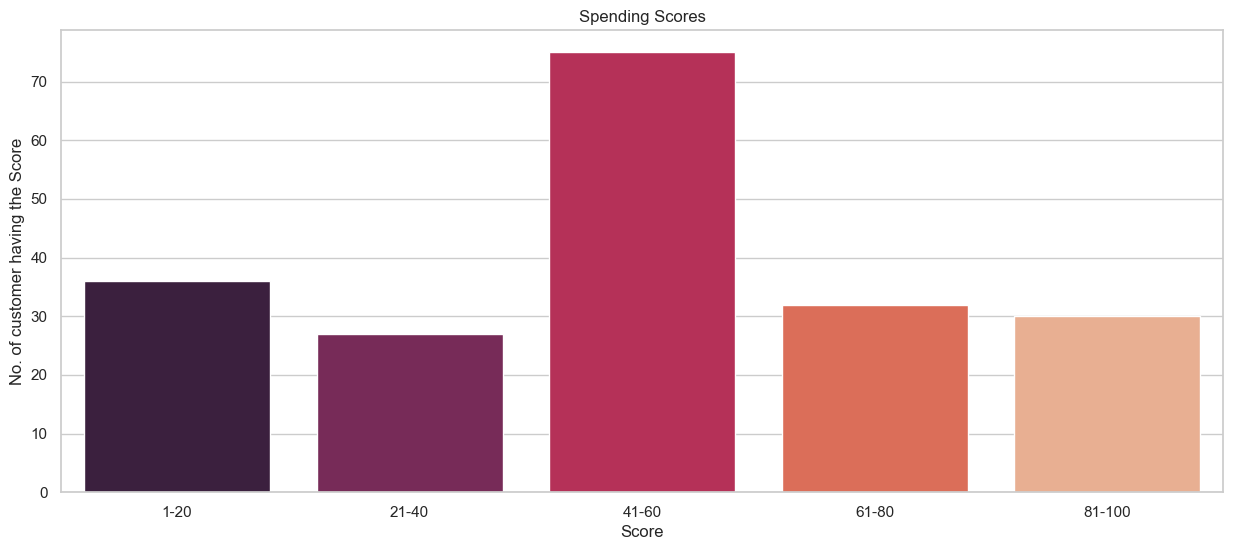

In [15]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <=20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21) & (df["Spending Score (1-100)"] <=40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=41) & (df["Spending Score (1-100)"] <=60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=61) & (df["Spending Score (1-100)"] <=80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=81) & (df["Spending Score (1-100)"] <=100)]

ssx = ["1-20","21-40","41-60","61-80","81-100"]
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx , y=ssy , palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("No. of customer having the Score")
plt.show()

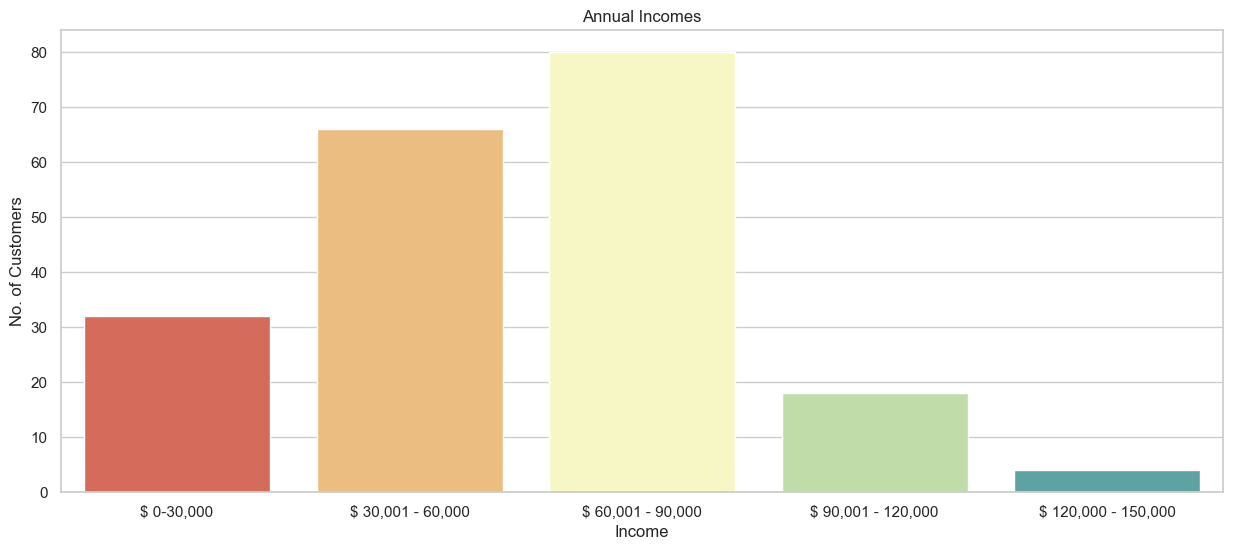

In [16]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0-30,000" , "$ 30,001 - 60,000" , "$ 60,001 - 90,000" , "$ 90,001 - 120,000" , "$ 120,000 - 150,000"]
aiy = [len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = aix , y = aiy , palette = "Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("No. of Customers")
plt.show()

In [18]:
X = df[["Age" , "Spending Score (1-100)"]]
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X)
print(label)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [19]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


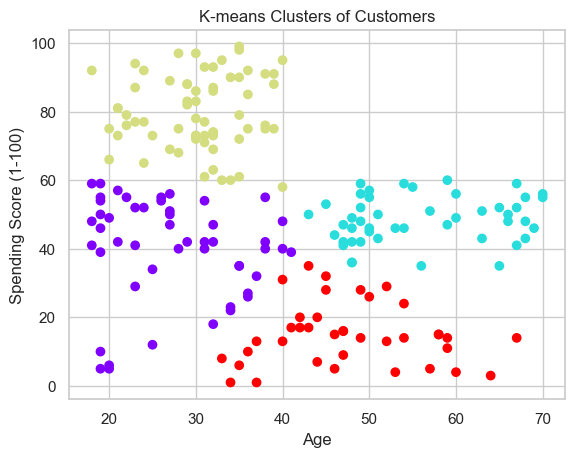

In [20]:
X = df[["Age" , "Spending Score (1-100)"]]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
num_clusters = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Add cluster labels to the original data
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df["Age"], df["Spending Score (1-100)"], c=df['cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel("Spending Score (1-100)")
plt.title('K-means Clusters of Customers')
plt.show()

In [21]:
X2=df[["Annual Income (k$)" , "Spending Score (1-100)"]].values
kmeans = KMeans(n_clusters=5)
label= kmeans.fit_predict(X2)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [22]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]]


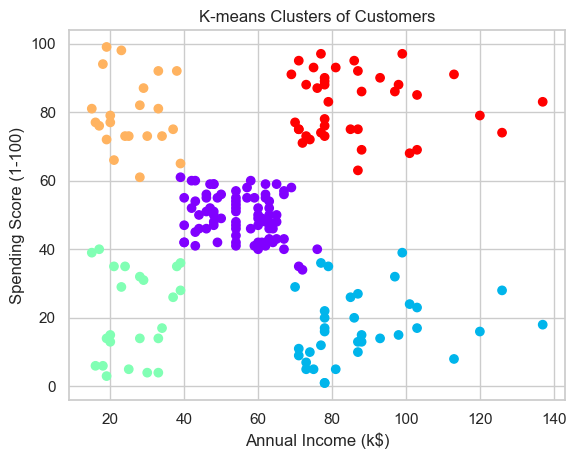

In [23]:
X2=df[["Annual Income (k$)" , "Spending Score (1-100)"]].values

# Standardize the features
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Choose the number of clusters
num_clusters = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X2_scaled)

# Add cluster labels to the original data
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df['cluster'], cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title('K-means Clusters of Customers')
plt.show()

In [24]:
X3 = df[["Age" , "Annual Income (k$)" ,"Spending Score (1-100)"]].values
kmeaans = KMeans(n_clusters= 5)
labels=kmeans.fit_predict(X3)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [25]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [40.32432432 87.43243243 18.18918919]
 [43.12658228 54.82278481 49.83544304]
 [25.27272727 25.72727273 79.36363636]]


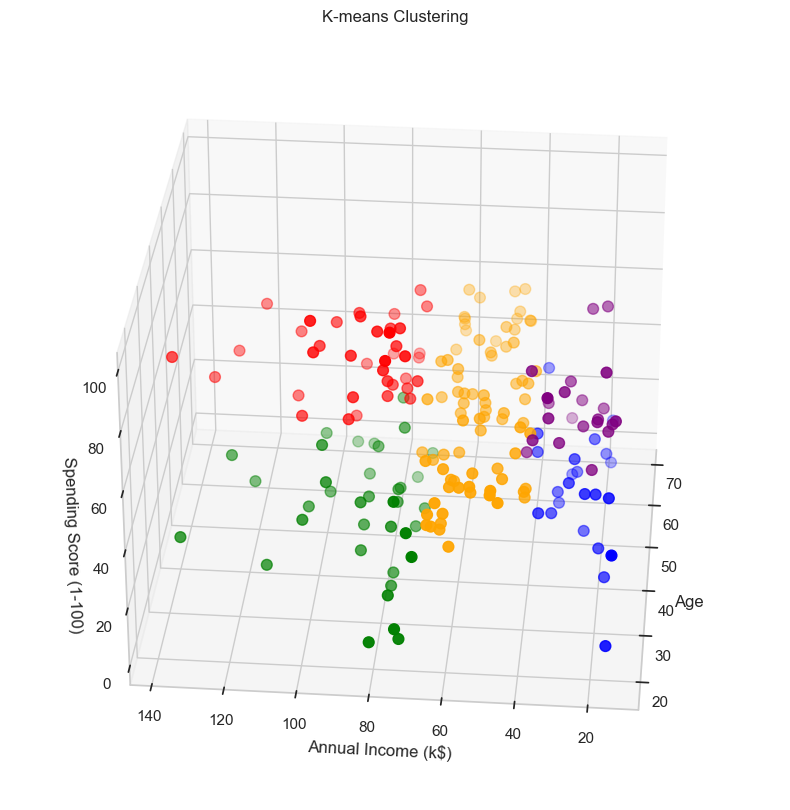

In [26]:
X3 = df[["Age" , "Annual Income (k$)" ,"Spending Score (1-100)"]].values
clusters = kmeans.fit_predict(X3)
df['labels'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.labels == 0], df["Annual Income (k$)"][df.labels == 0] , df["Spending Score (1-100)"][df.labels == 0] , c ='blue' , s= 60)
ax.scatter(df.Age[df.labels == 1], df["Annual Income (k$)"][df.labels == 1] , df["Spending Score (1-100)"][df.labels == 1] , c ='red' , s= 60)
ax.scatter(df.Age[df.labels == 2], df["Annual Income (k$)"][df.labels == 2] , df["Spending Score (1-100)"][df.labels == 2] , c ='green' , s= 60)
ax.scatter(df.Age[df.labels == 3], df["Annual Income (k$)"][df.labels == 3] , df["Spending Score (1-100)"][df.labels == 3] , c ='orange' , s= 60)
ax.scatter(df.Age[df.labels == 4], df["Annual Income (k$)"][df.labels == 4] , df["Spending Score (1-100)"][df.labels == 4] , c ='purple' , s= 60)
ax.view_init(30,185)


ax.set_xlabel('Age')
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title('K-means Clustering')

plt.show()
